<a href="https://colab.research.google.com/github/muhammadnurarasy/cctv-weapon-detection/blob/main/weapon_detection_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.3 MB/s eta 0:00:00


In [8]:
!cp -r /content/drive/MyDrive/cctv_weapon /content/


In [21]:
%%writefile cctv_weapon.yaml
path: /content/cctv_weapon/Dataset
train: images
val: images   # same folder, YOLO will auto-split
test: images

names:
  0: Person
  1: Weapon


Overwriting cctv_weapon.yaml


In [10]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")   # nano model = fastest

model.train(
    data="cctv_weapon.yaml",
    epochs=50,
    imgsz=640,
    save=True,               # save checkpoints
    save_period=1,           # save every epoch
    project="/content/drive/MyDrive/cctv_training",  # save permanently
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=cctv_weapon.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x789d8569d4c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [12]:
!ls /content/drive/MyDrive/cctv_training/train/weights


best.pt     epoch17.pt	epoch25.pt  epoch33.pt	epoch41.pt  epoch4.pt
epoch0.pt   epoch18.pt	epoch26.pt  epoch34.pt	epoch42.pt  epoch5.pt
epoch10.pt  epoch19.pt	epoch27.pt  epoch35.pt	epoch43.pt  epoch6.pt
epoch11.pt  epoch1.pt	epoch28.pt  epoch36.pt	epoch44.pt  epoch7.pt
epoch12.pt  epoch20.pt	epoch29.pt  epoch37.pt	epoch45.pt  epoch8.pt
epoch13.pt  epoch21.pt	epoch2.pt   epoch38.pt	epoch46.pt  epoch9.pt
epoch14.pt  epoch22.pt	epoch30.pt  epoch39.pt	epoch47.pt  last.pt
epoch15.pt  epoch23.pt	epoch31.pt  epoch3.pt	epoch48.pt
epoch16.pt  epoch24.pt	epoch32.pt  epoch40.pt	epoch49.pt


In [13]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/cctv_training/train/weights/best.pt")
metrics = model.val()


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1829.7±604.5 MB/s, size: 1515.2 KB)
val: Scanning /content/cctv_weapon/Dataset/labels.cache... 141 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 141/141 113.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 4.9s/it 43.7s
                   all        141        269      0.982       0.96       0.99      0.806
                weapon        139        139      0.987      0.993      0.995      0.878
                person        130        130      0.976      0.928      0.985      0.733
Speed: 3.8ms preprocess, 235.4ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to /content/runs/detect/val


In [14]:
print("mAP50-95:", metrics.box.map)
print("mAP50:", metrics.box.map50)
print("Per-class mAP:", metrics.box.maps)


mAP50-95: 0.8058021800693425
mAP50: 0.9899161137889059
Per-class mAP: [    0.87815     0.73346]


In [15]:
model.val(save_json=True, save_txt=True, save_conf=True, plots=True)


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1715.2±231.2 MB/s, size: 1543.5 KB)
val: Scanning /content/cctv_weapon/Dataset/labels.cache... 141 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 141/141 144.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 5.9s/it 53.4s
                   all        141        269      0.982       0.96       0.99      0.806
                weapon        139        139      0.987      0.993      0.995      0.878
                person        130        130      0.976      0.928      0.985      0.733
Speed: 1.6ms preprocess, 222.7ms inference, 0.0ms loss, 3.4ms postprocess per image
Saving /content/runs/detect/val2/predictions.json...
Results saved to /content/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x789d845d7ec0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [16]:
from google.colab import files
uploaded = files.upload()


Saving download.jpg to download.jpg



image 1/1 /content/download.jpg: 448x640 1 weapon, 294.5ms
Speed: 6.2ms preprocess, 294.5ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


array([[[255, 253, 245],
        [255, 253, 245],
        [255, 253, 245],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 253, 245],
        [255, 253, 245],
        [255, 253, 245],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 253, 245],
        [255, 253, 245],
        [255, 253, 245],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[202, 191, 187],
        [202, 191, 187],
        [201, 191, 184],
        ...,
        [173, 199, 215],
        [162, 188, 205],
        [151, 175, 193]],

       [[202, 191, 187],
        [202, 191, 187],
        [200, 190, 183],
        ...,
        [174, 201, 221],
        [168, 195, 216],
        [162, 189, 210]],

       [[201, 190, 186],
        [200, 189, 185],
        [199, 189, 182],
        ...,
        [173, 201, 225],
        [175, 202, 228],
        [176, 203, 229]]], dtype=uint8)
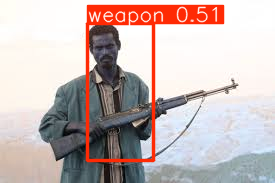

In [22]:
results = model.predict(list(uploaded.keys())[0], conf=0.25)
results[0].plot()


In [32]:
model.predict(
    source="/content/cctv_weapon/evaluation.mp4",
    save=True,
    conf=0.25
)



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/145) /content/cctv_weapon/evaluation.mp4: 640x448 1 person, 396.3ms
video 1/1 (frame 2/145) /content/cctv_weapon/evaluation.mp4: 640x448 1 person, 313.1ms
video 1/1 (frame 3/145) /content/cctv_weapon/evaluation.mp4: 640x448 1 person, 512.8ms
video 1/1 (frame 4/145) /content/cctv_weapon/evaluation.mp4: 640x448 1 person, 481.0ms
video 1/1 (frame 5/145) /content/cctv_weapon/evaluation.mp4: 640x448 1 person, 366.6ms
video 1/1 (frame 6/14

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'weapon'}
 obb: None
 orig_img: array([[[ 70,  58,  60],
         [ 70,  58,  60],
         [ 71,  59,  61],
         ...,
         [ 91,  69,  73],
         [ 91,  69,  73],
         [ 91,  69,  73]],
 
        [[ 70,  58,  60],
         [ 70,  58,  60],
         [ 71,  59,  61],
         ...,
         [ 91,  69,  73],
         [ 91,  69,  73],
         [ 91,  69,  73]],
 
        [[ 70,  58,  60],
         [ 70,  58,  60],
         [ 71,  59,  61],
         ...,
         [ 92,  70,  74],
         [ 92,  70,  74],
         [ 92,  70,  74]],
 
        ...,
 
        [[ 72,  55,  56],
         [ 82,  65,  66],
         [ 79,  62,  63],
         ...,
         [240, 195, 198],
         [240, 195, 198],
         [240, 195, 198]],
 
        [[ 72,  55,  56],
         [ 81,  64,  65],
         [ 83,  66,  67],
         ...,
     

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
model = YOLO("/content/drive/MyDrive/cctv_training/train/weights/best.pt")
model.model.names = {0: "person", 1: "weapon"}

model.export(format="tflite", imgsz=640, int8=True)


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (AMD EPYC 7B12)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/cctv_training/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.19.0...
TensorFlow SavedModel: collecting INT8 calibration images from 'data=coco8.yaml'

WARNING ⚠️ Dataset 'coco8.yaml' images not found, missing path '/content/datasets/coco8/images/val'
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100% ━━━━━━━━━━━━ 25/25 3.2Kfiles/s 0.0s
Dataset download success ✅ (0.5s), saved to /content/datasets

Fast image access ✅ (ping: 0.0±0.0 ms, read: 977.3±344.1 MB/s, size: 54.0 KB)
Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 cor

'/content/drive/MyDrive/cctv_training/train/weights/best_saved_model/best_int8.tflite'

In [9]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/cctv_training/train/weights/best_saved_model/best_float32.tflite")

results = model("/content/drive/MyDrive/cctv_weapon/evaluation.mp4", save=True)


WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /content/drive/MyDrive/cctv_training/train/weights/best_saved_model/best_float32.tflite for TensorFlow Lite inference...

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/145) /content/drive/MyDrive/cctv_weapon/evaluation.mp4: 640x640 1 person, 120.5ms
video 1/1 (frame 2/145) /content/drive/MyDrive/cctv

In [14]:
!git config --global user.email "muhammadnurarasy@gmail.com"
!git config --global user.name "muhammadnurarasy"


In [21]:
!git lfs untrack "*.pt"
!git lfs untrack "*.tflite"
!git lfs untrack "*.onnx"
!git lfs untrack "*.pb"


In [22]:
rm .gitattributes


rm: cannot remove '.gitattributes': No such file or directory


In [24]:
!rm -f *.pt
!rm -f *.tflite
!rm -f *.pb
!rm -rf variables


In [25]:
!git rm -r --cached .
!git add .


rm '.gitattributes'
rm 'README.md'
rm 'best.pt'
rm 'best_float16.tflite'
rm 'best_float32.tflite'
rm 'best_full_integer_quant.tflite'
rm 'best_int8.tflite'
rm 'best_integer_quant.tflite'
rm 'fingerprint.pb'
rm 'last.pt'
rm 'metadata.yaml'
rm 'saved_model.pb'
rm 'variables/variables.data-00000-of-00001'
rm 'variables/variables.index'


In [27]:
!git commit -m "Clean repo: remove model files, keep code only"


[main b91f9e1] Clean repo: remove model files, keep code only
 12 files changed, 31 deletions(-)
 delete mode 100644 .gitattributes
 delete mode 100644 best.pt
 delete mode 100644 best_float16.tflite
 delete mode 100644 best_float32.tflite
 delete mode 100644 best_full_integer_quant.tflite
 delete mode 100644 best_int8.tflite
 delete mode 100644 best_integer_quant.tflite
 delete mode 100644 fingerprint.pb
 delete mode 100644 last.pt
 delete mode 100644 saved_model.pb
 delete mode 100644 variables/variables.data-00000-of-00001
 delete mode 100644 variables/variables.index


In [29]:
!git push --force origin main


batch response: This repository exceeded its LFS budget. The account responsible for the budget should increase it to restore access.
error: failed to push some refs to 'https://github.com/muhammadnurarasy/cctv-weapon-detection.git'
